In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette()
sns.set_theme()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'
TRAIN_CSV = pd.read_csv(path + 'final/train.csv', index_col=0)
ASSET_CSV = pd.read_csv(path + 'final/asset_details.csv', index_col=0)  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ASSET_CSV.reset_index(inplace= True )
asset_details = ASSET_CSV
asset_details[['Asset_ID', 'Asset_Name']].sort_values('Asset_ID')

,Asset_ID,Asset_Name
1,0,Binance Coin
2,1,Bitcoin
0,2,Bitcoin Cash
10,3,Cardano
13,4,Dogecoin
3,5,EOS.IO
5,6,Ethereum
4,7,Ethereum Classic
11,8,IOTA
6,9,Litecoin


In [ ]:
BTC_ID = 1

In [ ]:
TRAIN_CSV.reset_index(inplace= True )

In [ ]:
btc = TRAIN_CSV[TRAIN_CSV["Asset_ID"]==1].set_index("timestamp") # Asset_ID = 2 for Bitcoin Cash
btc_mini = btc.iloc[-1000:] 

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=btc_mini['Open'], high=btc_mini['High'], low=btc_mini['Low'], close=btc_mini['Close'],
                                    )])
fig.show()

In [ ]:
df = TRAIN_CSV
df = df.loc[df.Asset_ID == BTC_ID] 
df = df.drop(columns=['Asset_ID']) 
df.timestamp = pd.to_datetime(df.timestamp, unit='s', origin='unix') 
df = df.set_index('timestamp') 
df

,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,
2018-01-01 00:01:00,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.014643
2018-01-01 00:02:00,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.015037
2018-01-01 00:03:00,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.010309
2018-01-01 00:04:00,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.008999
2018-01-01 00:05:00,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.008079
...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN
2021-09-20 23:57:00,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN
2021-09-20 23:58:00,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN


<AxesSubplot:title={'center':'BTC/USD'}, xlabel='timestamp'>

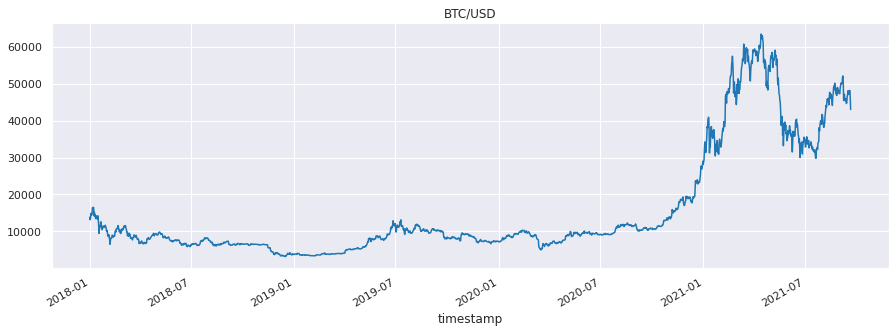

In [ ]:
df.Close.iloc[::1000].plot(figsize=(15, 5), color=colors[0], title='BTC/USD')

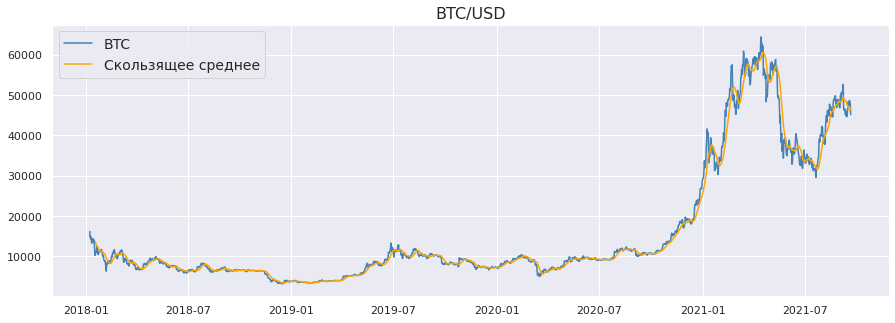

In [ ]:
plt.figure(figsize = (15,5))
 

plt.plot(df.Close.iloc[::1000], label = 'BTC', color = 'steelblue')
plt.plot(df.Close.iloc[::1000].rolling(window = 15).mean(), label = 'Скользящее среднее', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
plt.title('BTC/USD', fontsize = 16)
 
# выведем обе кривые на одном графике
plt.show()

In [ ]:
df.isna().sum()

Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target    304
dtype: int64

In [ ]:
(df.index[1:] - df.index[:-1]).value_counts()

0 days 00:01:00    1956136
0 days 00:02:00         78
0 days 00:03:00         12
0 days 00:04:00         11
0 days 00:07:00          9
0 days 00:06:00          4
0 days 00:10:00          4
0 days 00:08:00          3
0 days 00:12:00          3
0 days 00:14:00          3
0 days 00:05:00          3
0 days 00:09:00          2
0 days 00:27:00          2
0 days 00:30:00          2
0 days 00:18:00          2
0 days 00:37:00          1
0 days 00:11:00          1
0 days 00:26:00          1
0 days 00:17:00          1
0 days 00:20:00          1
0 days 00:40:00          1
0 days 00:24:00          1
Name: timestamp, dtype: int64

In [ ]:
df = df.reindex(index=pd.date_range(df.index[0], df.index[-1], freq='1min'), method='ffill')

In [ ]:
(df.index[1:] - df.index[:-1]).value_counts()

0 days 00:01:00    1956959
dtype: int64

In [ ]:
df['Target'] = np.log(df.Close.shift(-15, freq='min') / df.Close)
df

,Count,Open,High,Low,Close,Volume,VWAP,Target
2018-01-01 00:01:00,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.017932
2018-01-01 00:02:00,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.014751
2018-01-01 00:03:00,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.015151
2018-01-01 00:04:00,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.010362
2018-01-01 00:05:00,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.009040
...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN
2021-09-20 23:57:00,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN
2021-09-20 23:58:00,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN
2021-09-20 23:59:00,4047.0,42839.012802,43042.160000,42818.10,43017.277143,138.335477,42935.761938,NaN


In [ ]:
df.isna().sum()

Count      0
Open       0
High       0
Low        0
Close      0
Volume     0
VWAP       0
Target    15
dtype: int64

In [ ]:
df = df.dropna()

<AxesSubplot:title={'center':'Target'}>

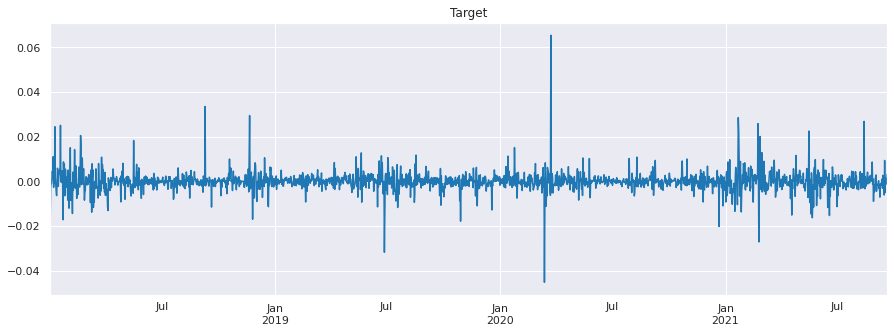

In [ ]:
df.Target.iloc[::1000].plot(figsize=(15, 5), color=colors[0], title='Target')

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



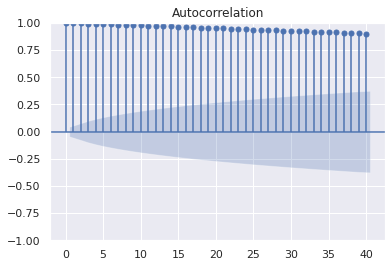

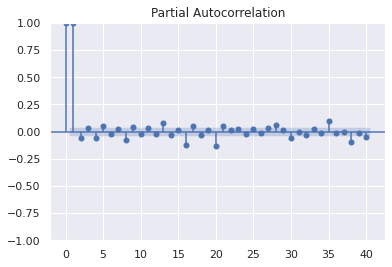

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# применим функцию к нашему набору данных
plot_acf(df.Close.iloc[::1000], lags=40)
plot_pacf(df.Close.iloc[::1000], lags=40);
plt.show()

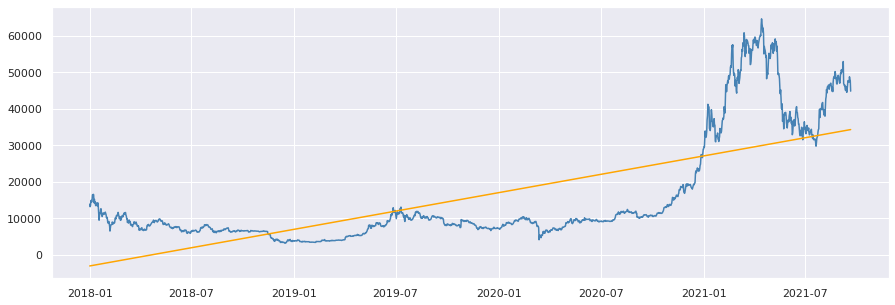

<Figure size 1080x360 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 5))
alpha, beta = np.polyfit(list(range(1, len(df.Close.iloc[::1000]) + 1)), df.Close.iloc[::1000], 1)

trend = pd.Series(data=alpha*np.array(range(1, len(df.Close.iloc[::1000]) + 1)) + beta, index=df.Close.iloc[::1000].index)
plt.plot( df.Close.iloc[::1000], label = 'BTC', color = 'steelblue')
plt.plot( trend, label = 'BTC', color = 'orange')
plt.figure(figsize=(15, 5))
plt.show()

In [ ]:
lags = [15, 30, 60, 60 * 2, 60 * 4, 60 * 24] # In minutes: 15min, 30min, 1h, 2h, 4h, 24h
mas = [15, 60, 60 * 24, 60 * 24 * 7]         # In minutes: 15min, 1h, 1d, 7d

def create_features(df):
    df = df.copy()
    # Вычислить log-returns для различных лагов
    for lag in lags:
        df[f'log_return_{lag}'] = np.log(df.Close.shift(lag, freq='min') / df.Close)
    # Скользящие средние (как цена закрывается относительно скользящих средних)
    for ma in mas:
        df[f'log_close_ma_{ma}'] = np.log(df.Close / df.Close.rolling(window=ma).mean())
    # Логарифмическая разница между Low и High (показатель волатильности)
    df['log_high/low'] = np.log(df.High / df.Low)
    # Особенности, связанные со временем
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year
    # В новом наборе данных есть несколько NaN в первых 7-дневных временных индексах из-за скользящих средних, поэтому мы удалим эти строки.
    df = df.dropna()
    return df

In [ ]:
df = create_features(df)
df

,Count,Open,High,Low,Close,Volume,VWAP,Target,log_return_15,log_return_30,...,log_return_1440,log_close_ma_15,log_close_ma_60,log_close_ma_1440,log_close_ma_10080,log_high/low,hour,dayofweek,month,year
2018-01-08 00:00:00,314.0,16195.012500,16285.00,16102.05,16174.262500,80.431560,16177.379920,-0.005192,0.004275,0.009191,...,0.056754,-0.000596,-0.007501,-0.020409,0.064756,0.011298,0,0,1,2018
2018-01-08 00:01:00,387.0,16167.466000,16229.98,16089.00,16133.042000,52.073213,16151.763785,-0.003824,0.006522,0.012012,...,0.059645,-0.002713,-0.009757,-0.022919,0.062189,0.008724,0,0,1,2018
2018-01-08 00:02:00,651.0,16134.654000,16168.19,16074.00,16113.760000,95.342615,16120.334017,-0.002303,0.006526,0.012245,...,0.059904,-0.003474,-0.010627,-0.024073,0.060978,0.005843,0,0,1,2018
2018-01-08 00:03:00,319.0,16113.156000,16150.91,16064.70,16097.738000,64.452977,16105.837484,0.000665,0.006958,0.010750,...,0.060566,-0.004005,-0.011302,-0.025025,0.059968,0.005352,0,0,1,2018
2018-01-08 00:04:00,490.0,16094.474000,16134.49,16010.40,16071.378000,71.837536,16079.158249,0.002710,0.007832,0.011253,...,0.060727,-0.005122,-0.012576,-0.026622,0.058314,0.007721,0,0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-20 23:41:00,2281.0,42718.815000,42819.38,42690.84,42781.970571,76.339988,42755.785162,0.002732,-0.000072,0.006497,...,0.098820,0.001893,-0.007914,-0.043436,-0.096175,0.003006,23,0,9,2021
2021-09-20 23:42:00,2642.0,42772.921250,42827.10,42690.75,42755.592500,117.429123,42749.075916,0.002439,0.000564,0.005497,...,0.099108,0.001314,-0.008109,-0.043983,-0.096787,0.003189,23,0,9,2021
2021-09-20 23:43:00,2134.0,42762.290000,42811.30,42694.37,42717.234286,78.049458,42749.024591,0.002567,-0.000393,0.006356,...,0.099922,0.000390,-0.008579,-0.044811,-0.097680,0.002735,23,0,9,2021
2021-09-20 23:44:00,2165.0,42703.802500,42752.00,42636.76,42657.202500,86.518794,42680.263993,0.008406,0.000056,0.013092,...,0.101858,-0.001012,-0.009561,-0.046146,-0.099081,0.002699,23,0,9,2021


In [ ]:
FEATURES = ['log_return_15', 'log_return_30', 'log_return_60', 'log_return_120', 'log_return_240', 'log_return_1440', 'log_close_ma_15', 'log_close_ma_60', 'log_close_ma_1440', 'log_close_ma_10080', 'log_high/low', 'hour', 'dayofweek', 'month', 'year']
TARGET = 'Target'

In [ ]:
from statsmodels.tsa.stattools import adfuller

p_value = adfuller(df.Close.iloc[::1000])[1]
p_value

0.9257692435205025

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

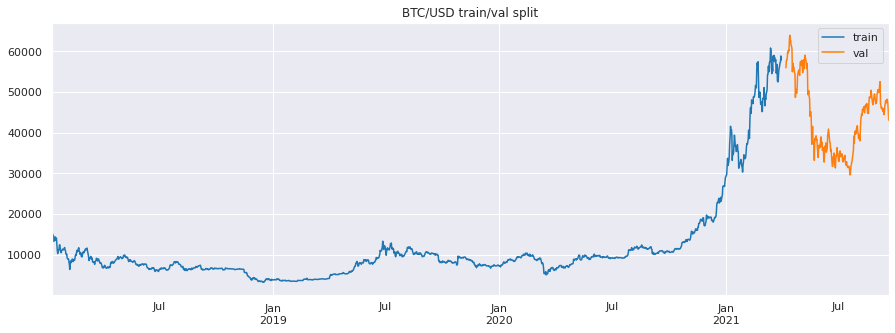

In [ ]:
df.Close.loc[:'2021-03'].iloc[::1000].plot(figsize=(15, 5), label='train', color=colors[0], title='BTC/USD train/val split')
df.Close.loc['2021-04-08':].iloc[::1000].plot(label='val', color=colors[1])
plt.legend()

In [ ]:
X_train = df[FEATURES].loc[:'2021-03'].to_numpy()
y_train = df[TARGET].loc[:'2021-03'].to_numpy()
X_val = df[FEATURES].loc['2021-04-08':].to_numpy()
y_val = df[TARGET].loc['2021-04-08':].to_numpy()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_val_scaled)


In [ ]:
print('Correlation between prediction and ground truth:', np.corrcoef(y_val, y_pred)[0, 1])

Correlation between prediction and ground truth: 0.013565966831817333


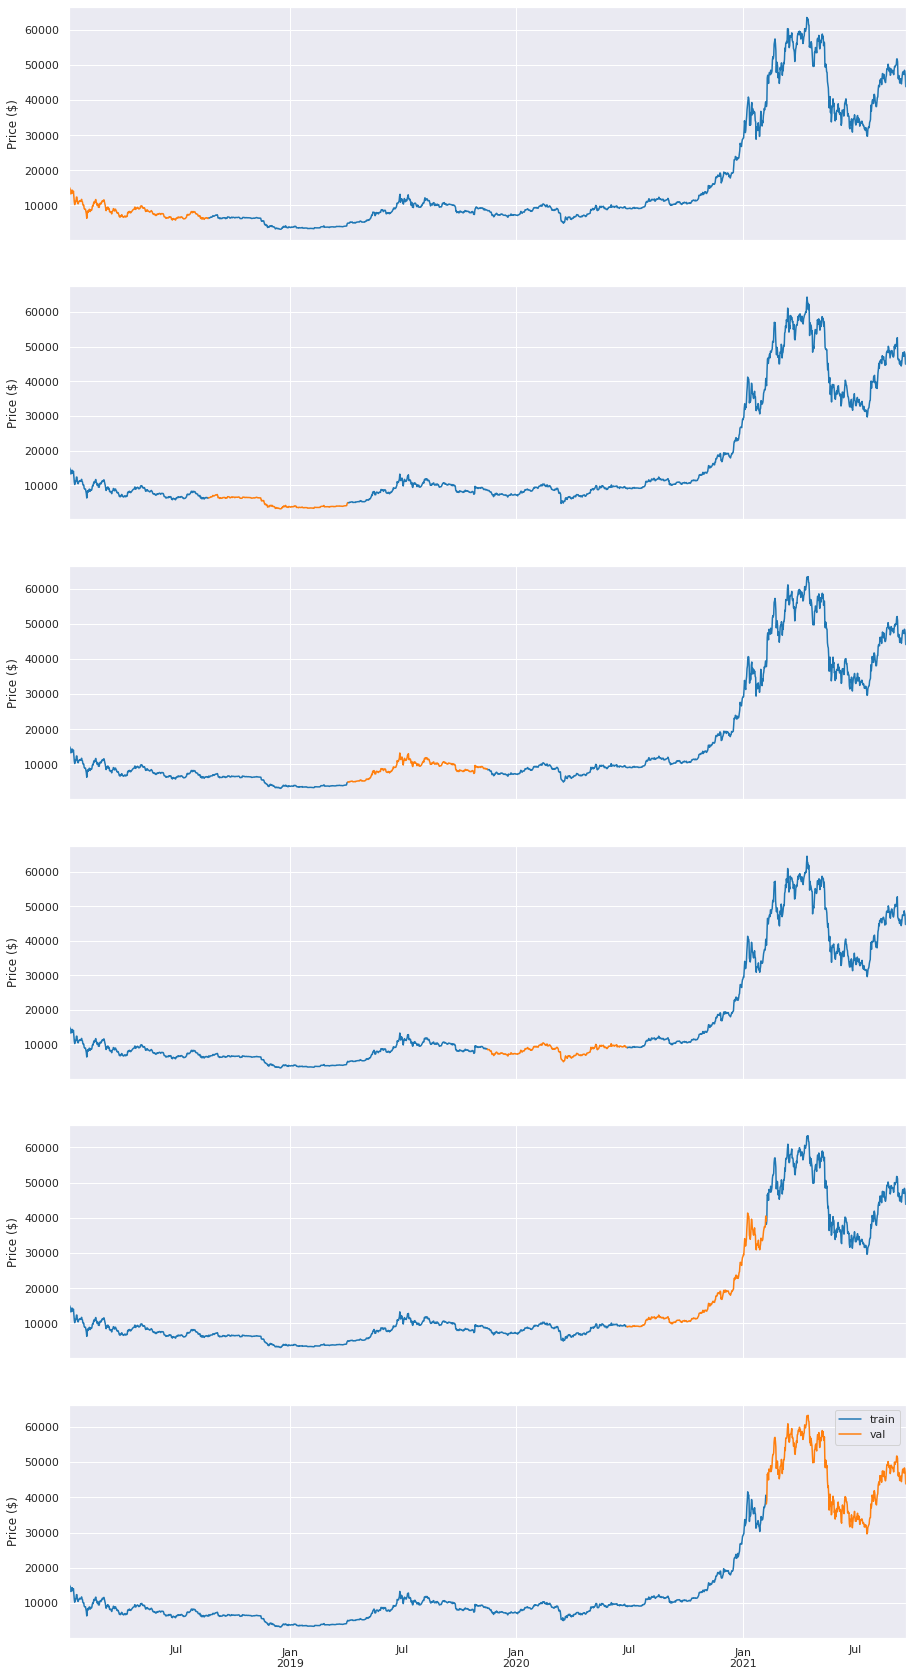

In [ ]:
from sklearn.model_selection import KFold

n_splits = 6
folds = KFold(n_splits=n_splits)

fig, axs = plt.subplots(n_splits, 1, figsize=(15, 5 * n_splits), sharex=True)
for split_idx, (train_idx, val_idx) in enumerate(folds.split(df[FEATURES])):
   
    if split_idx > 0:
        df.Close.iloc[train_idx[train_idx < val_idx[0]]].iloc[::1000].plot(ax=axs[split_idx], color=colors[0], label='train')
    if split_idx < n_splits - 1:
        df.Close.iloc[train_idx[train_idx > val_idx[-1]]].iloc[::1000].plot(ax=axs[split_idx], color=colors[0], label='train')
    df.Close.iloc[val_idx].iloc[::1000].plot(ax=axs[split_idx], color=colors[1], label='val')
    axs[split_idx].set_ylabel('Price ($)')
plt.legend()

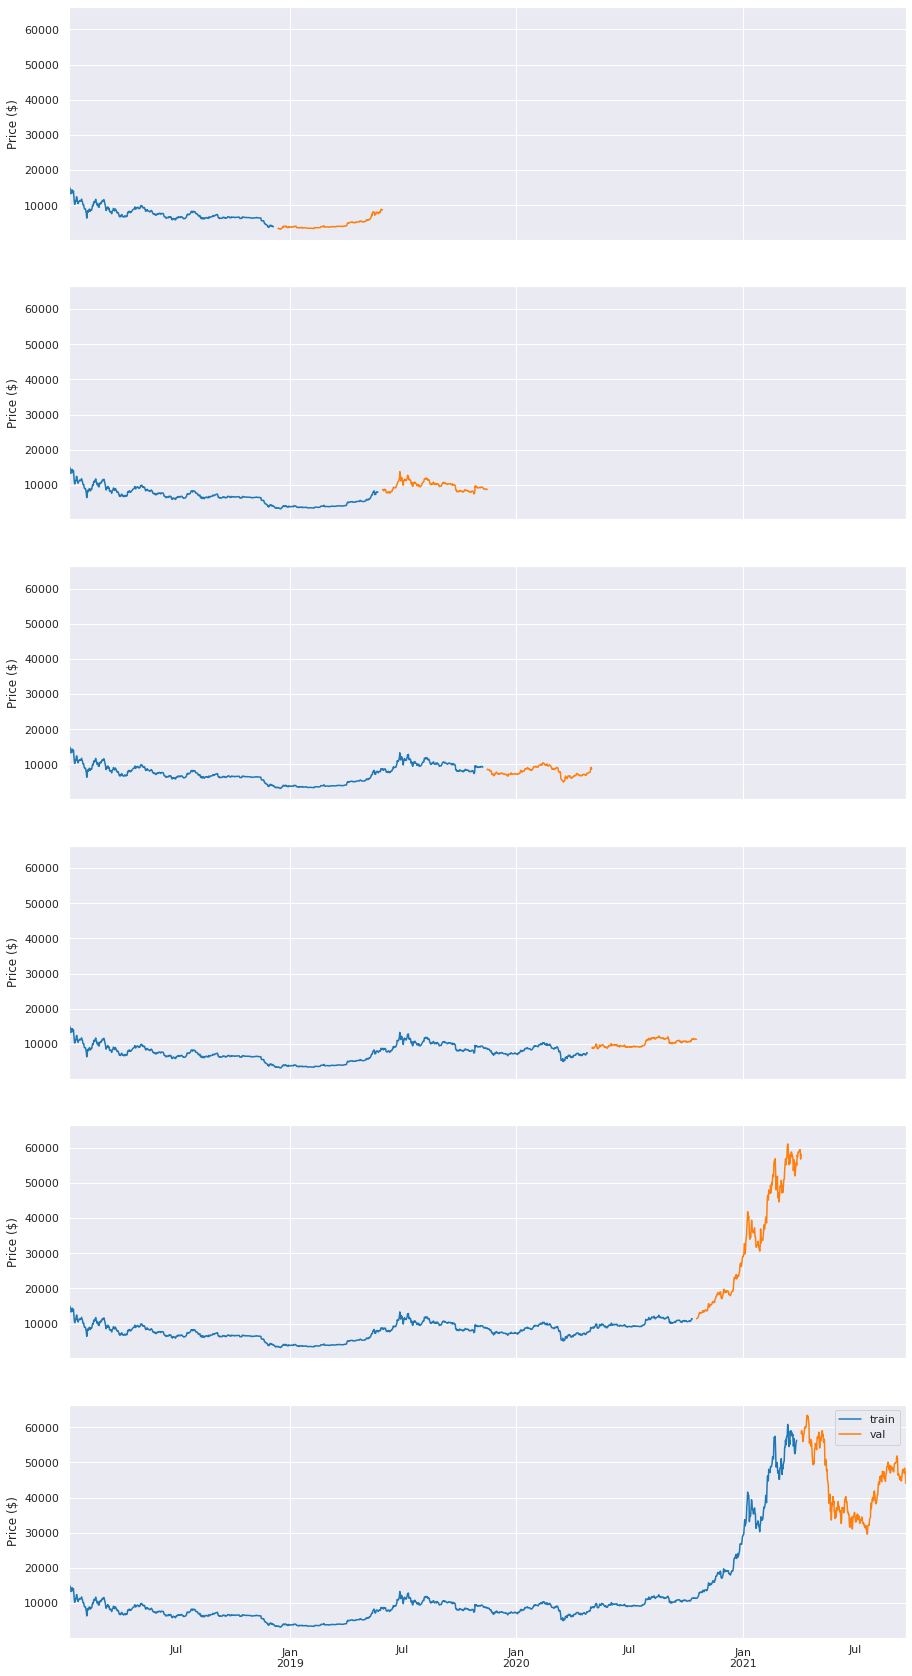

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=n_splits, gap=60 * 24 * 7, test_size=len(df) // (n_splits + 2))

fig, axs = plt.subplots(n_splits, 1, figsize=(15, 5 * n_splits), sharex=True, sharey=True)
for split_idx, (train_idx, val_idx) in enumerate(tss.split(df[FEATURES])):
    df.Close.iloc[train_idx].iloc[::1000].plot(ax=axs[split_idx], color=colors[0], label='train')
    df.Close.iloc[val_idx].iloc[::1000].plot(ax=axs[split_idx], color=colors[1], label='val')
    axs[split_idx].set_ylabel('Price ($)')
plt.legend()

Text(0, 0.5, 'Bitcoin Close')

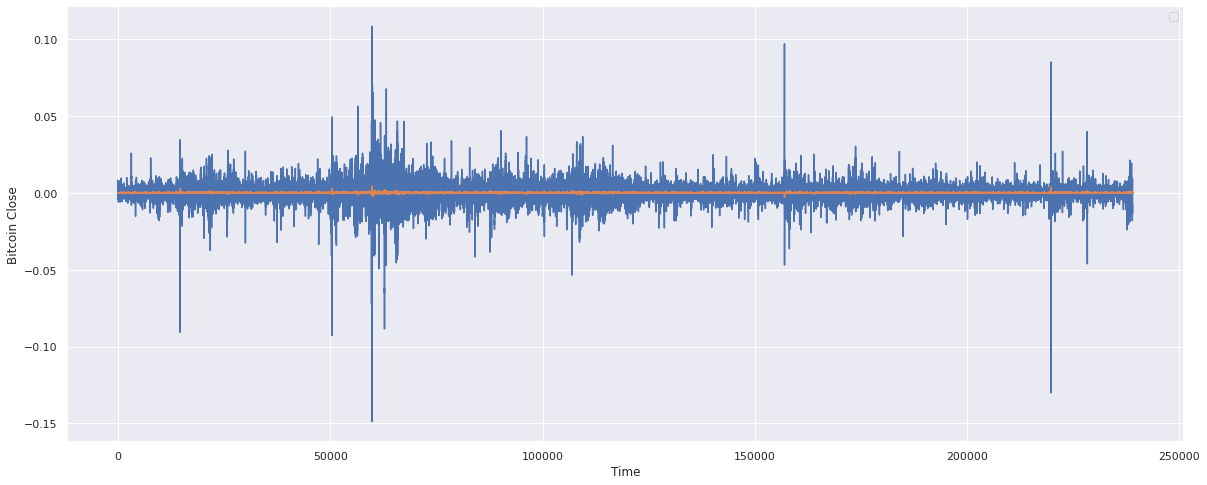

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_val)
plt.plot(y_pred)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Close')


In [ ]:

import lightgbm as lgb


In [ ]:
def corr(y_preds, eval_data):
    '''
    Метрика для использования во время обучения, дает корреляцию между
     прогнозируемая цель и истинное значение.
     Это должно вернуть кортеж:
     (Название метрики, значение метрики, чем выше, тем лучше)

    '''
    y = eval_data.label
    corr = np.corrcoef(y_preds, y)[0, 1]
    return 'corr', corr, True

In [ ]:
params = {
    'objective': 'regression',     # Делаем регресс
    'metric': 'rmse',              # Optimize RMSE
    'learning_rate': 0.05,         # Скорость обучения для повышения градиента
    'max_depth': 5,                # Максимальная глубина для деревьев регрессии
    'num_leaves': 5,               # Количество листьев в одном дереве решений
    'verbose': -1                  # Печатать только ошибки и предупреждения
}

In [ ]:
def cv(folds, params):
    # Record rmse and corr for each fold
    train_rmse, train_corr, val_rmse, val_corr = [], [], [], []
    # Collect the trained models for each fold
    models = []
    for split_idx, (train_idx, val_idx) in enumerate(folds.split(df[FEATURES])):
        print('Current fold:', split_idx + 1, '/', n_splits)
        # Locate train and validation sets for this fold
        train_set = lgb.Dataset(df[FEATURES].iloc[train_idx], df.Target.iloc[train_idx])
        val_set = lgb.Dataset(df[FEATURES].iloc[val_idx], df.Target.iloc[val_idx])
        # Training the model
        model = lgb.train(
            params=params,
            train_set=train_set,
            valid_sets=[train_set, val_set],
            valid_names=['train', 'val'],
            num_boost_round=5000,              # Number of boosting iterations (if we don't stop early)
            feval=corr,                        # Measure correlation in addition to rmse
            callbacks=[
                lgb.early_stopping(50),        # Stop training if metrics don't improve in 50 iterations
                       # Print metrics every 100 iterations
            ]
        )
        # Record results from this fold
        train_rmse.append(model.best_score['train']['rmse'])
        train_corr.append(model.best_score['train']['corr'])
        val_rmse.append(model.best_score['val']['rmse'])
        val_corr.append(model.best_score['val']['corr'])
        models.append(model)
        print('==============================================================')
    print('Average over folds:')
    print(f'\ttrain\'s rmse = {np.mean(train_rmse):.5f} ± {np.std(train_rmse):.5f}, corr = {np.mean(train_corr):.5f} ± {np.std(train_corr):.5f}')
    print(f'\tval\'s   rmse = {np.mean(val_rmse):.5f} ± {np.std(val_rmse):.5f}, corr = {np.mean(val_corr):.5f} ± {np.std(val_corr):.5f}')
    return train_rmse, train_corr, val_rmse, val_corr, models

In [ ]:
train_rmse, train_corr, val_rmse, val_corr, models = cv(tss, params)

Current fold: 1 / 6
[1]	train's rmse: 0.00488627	train's corr: 0.0821078	val's rmse: 0.00343923	val's corr: 0.059252
Training until validation scores don't improve for 50 rounds.
[2]	train's rmse: 0.00488443	train's corr: 0.107162	val's rmse: 0.00343921	val's corr: 0.0492366
[3]	train's rmse: 0.00488302	train's corr: 0.10349	val's rmse: 0.00343897	val's corr: 0.0569153
[4]	train's rmse: 0.00488159	train's corr: 0.108357	val's rmse: 0.00343875	val's corr: 0.0570111
[5]	train's rmse: 0.00488004	train's corr: 0.111911	val's rmse: 0.00343873	val's corr: 0.0552756
[6]	train's rmse: 0.00487883	train's corr: 0.112571	val's rmse: 0.00343859	val's corr: 0.0570687
[7]	train's rmse: 0.00487764	train's corr: 0.112808	val's rmse: 0.00343834	val's corr: 0.0579812
[8]	train's rmse: 0.00487655	train's corr: 0.113334	val's rmse: 0.00343817	val's corr: 0.0561897
[9]	train's rmse: 0.00487544	train's corr: 0.118257	val's rmse: 0.00343818	val's corr: 0.0548421
[10]	train's rmse: 0.00487445	train's corr: 0.

In [ ]:
def plot_importance(cv_boosters):
    for split_idx in range(n_splits):
        max_importance = cv_boosters[split_idx].feature_importance().max()
        lgb.plot_importance(cv_boosters[split_idx], title=f'Feature importance, split {split_idx + 1} / {n_splits}', xlim=(0, max_importance + 2))

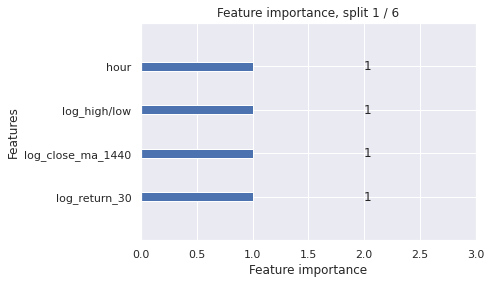

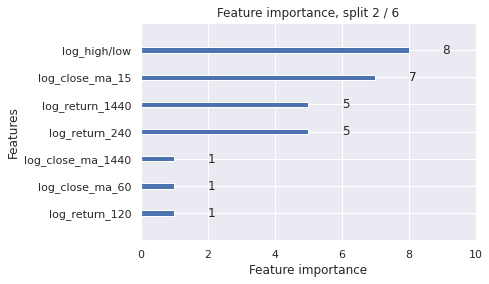

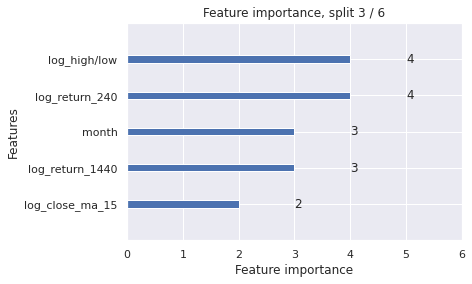

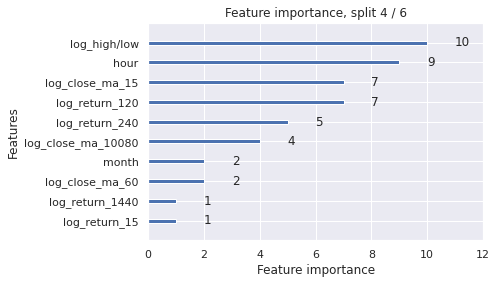

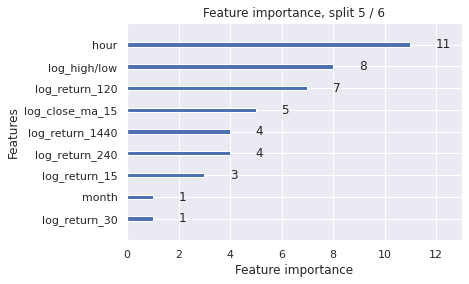

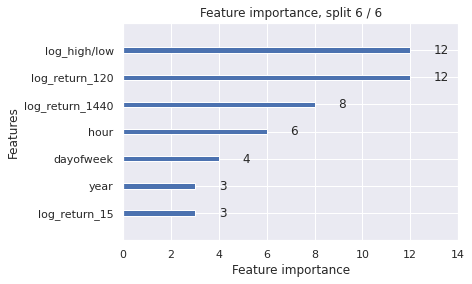

In [ ]:
plot_importance(models)